Random Forest<br>
COM20 - Avgustin Chynarbekov<br>
AI Final

About the data: Let’s consider a Company dataset with around 10 variables and 400 records.

The attributes are as follows:

<ol>
<li>Sales -- Unit sales (in thousands) at each location Competitor</li>
<li>Price -- Price charged by competitor at each location </li>
<li>Income -- Community income level (in thousands of dollars) </li>
<li>Advertising -- Local advertising budget for company at each location (in thousands of dollars) </li>
<li>Population -- Population size in region (in thousands)</li>
<li>Price -- Price company charges for car seats at each site </li>
<li>Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
</li>
<li>Age -- Average age of the local population</li>
<li>Education -- Education level at each location </li>
<li>Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location </li>
<li>US -- A factor with levels No and Yes to indicate whether the store is in the US or not </li>
</ol>

Problem Statement:

A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Approach - A Random Forest can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [3]:
import pandas as pd
features = pd.read_csv('generated_data.csv')
features.head(10)

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age   
0    8.6        167      21           16         405    150    Medium   29  \
1   10.5        182      88            1         473    190       Bad   57   
2    6.8        128      13            4         328    100       Bad   39   
3   21.8        168      28            4         473     74       Bad   51   
4   12.5        163      36            9         295     60       Bad   34   
5   18.5        143      22           18         430     96      Good   33   
6   22.0        182      19            3         389     66       Bad   59   
7   22.7        181      67            9         251    114      Good   34   
8   18.9        146      64            9         352    186    Medium   53   
9    8.2        122      78           12         160    100       Bad   60   

   Education Urban   US  
0         13   Yes  Yes  
1         12    No   No  
2         13   Yes  Yes  
3          9   Yes   No  
4         14   Yes  Yes  
5         10   Yes  Yes  
6          9   Yes  Yes  
7         12   Yes   No  
8         15    No   No  
9         16   Yes   No

In [4]:
features.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
print('The number of rows and columns of our DataFrame:', features.shape)

The number of rows and columns of our DataFrame: (400, 11)


In [6]:
features.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

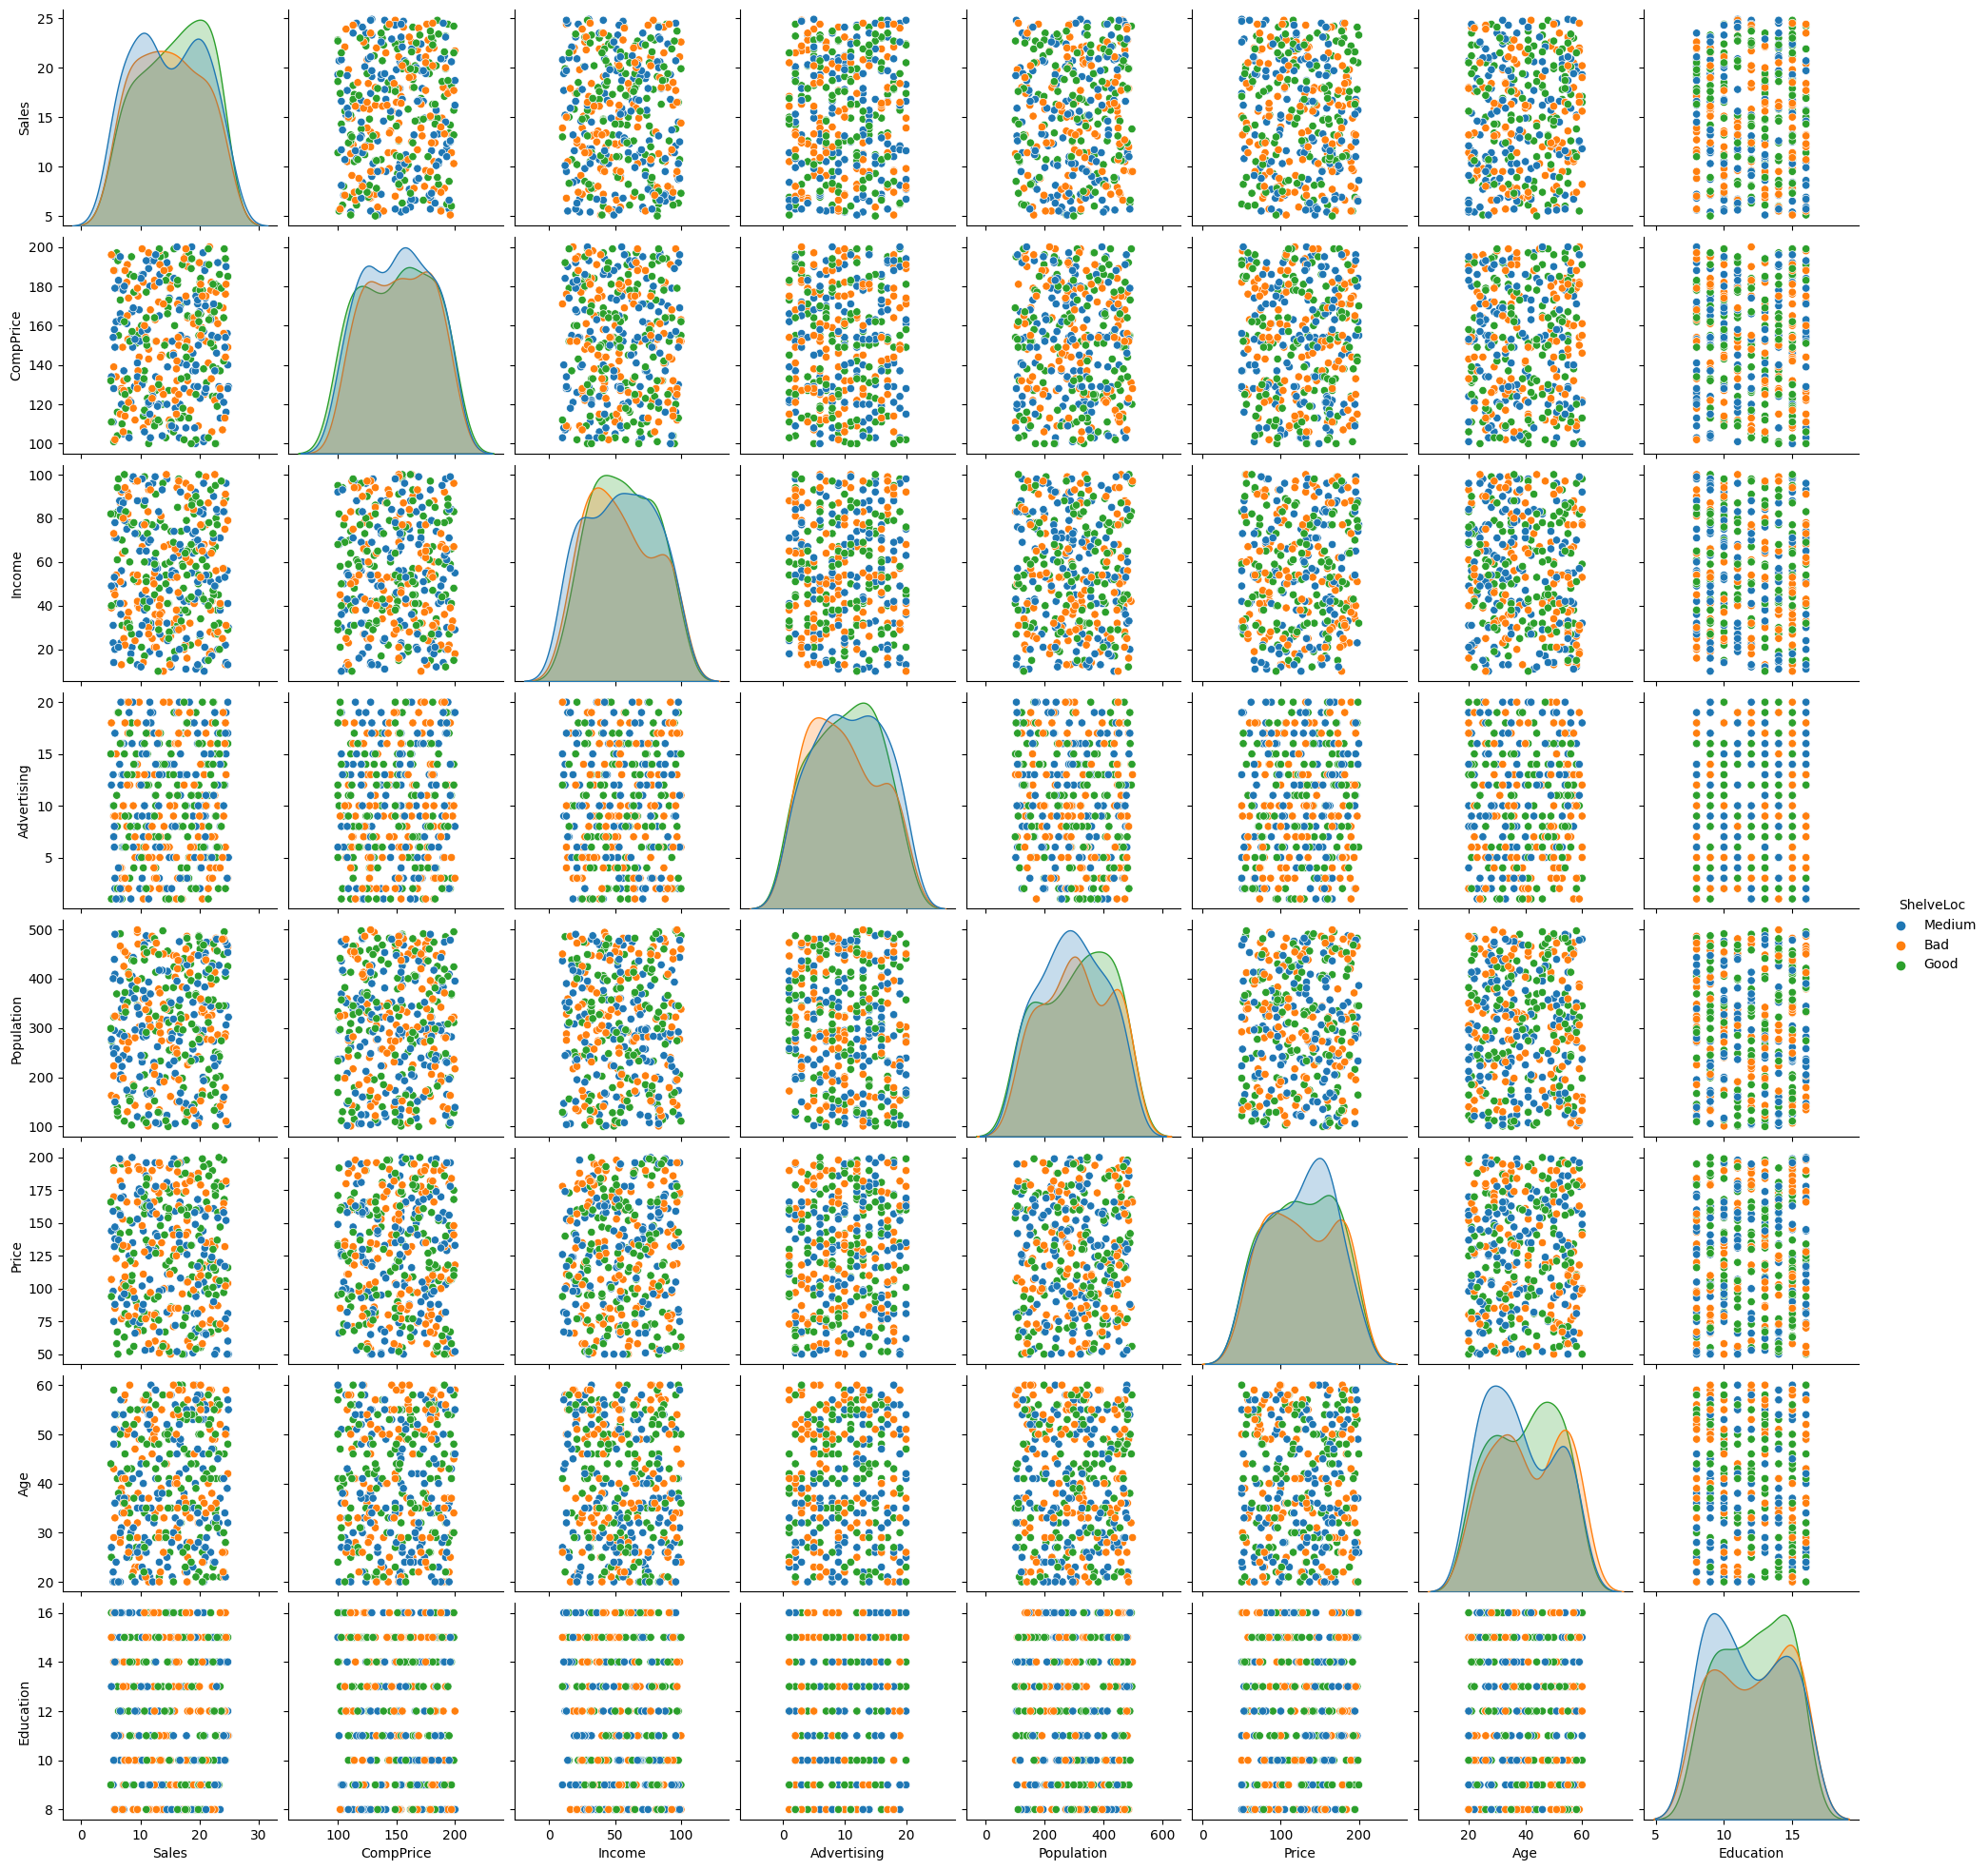

In [7]:
sns.pairplot(data=features, hue = 'ShelveLoc')

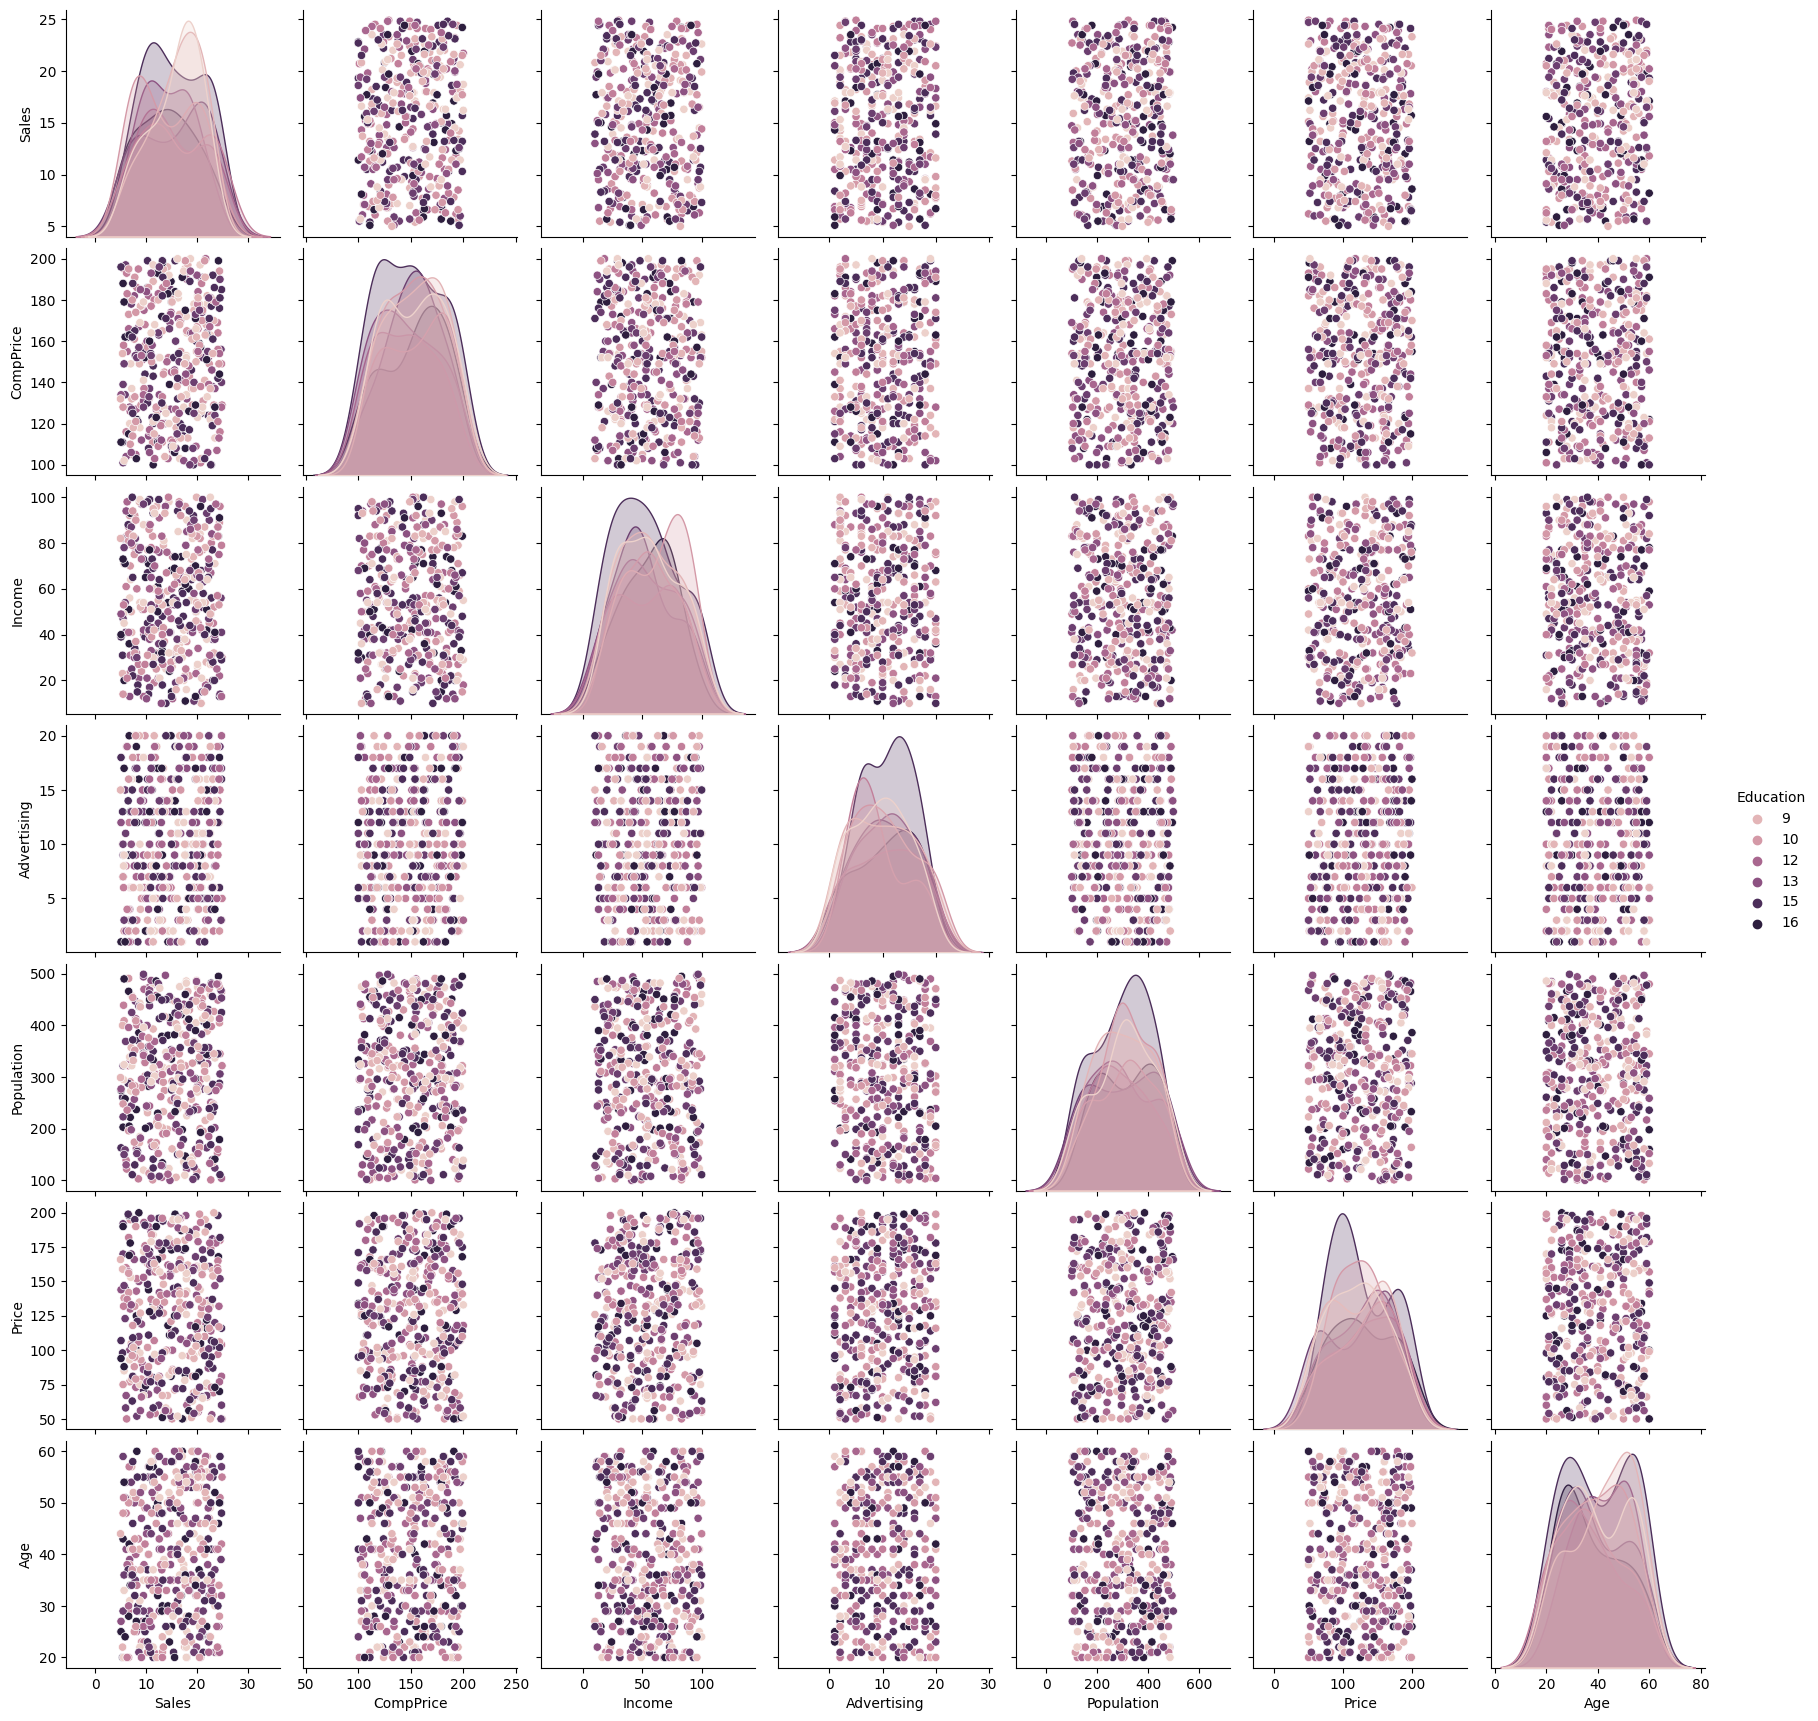

In [8]:
sns.pairplot(data=features, hue = 'Education')

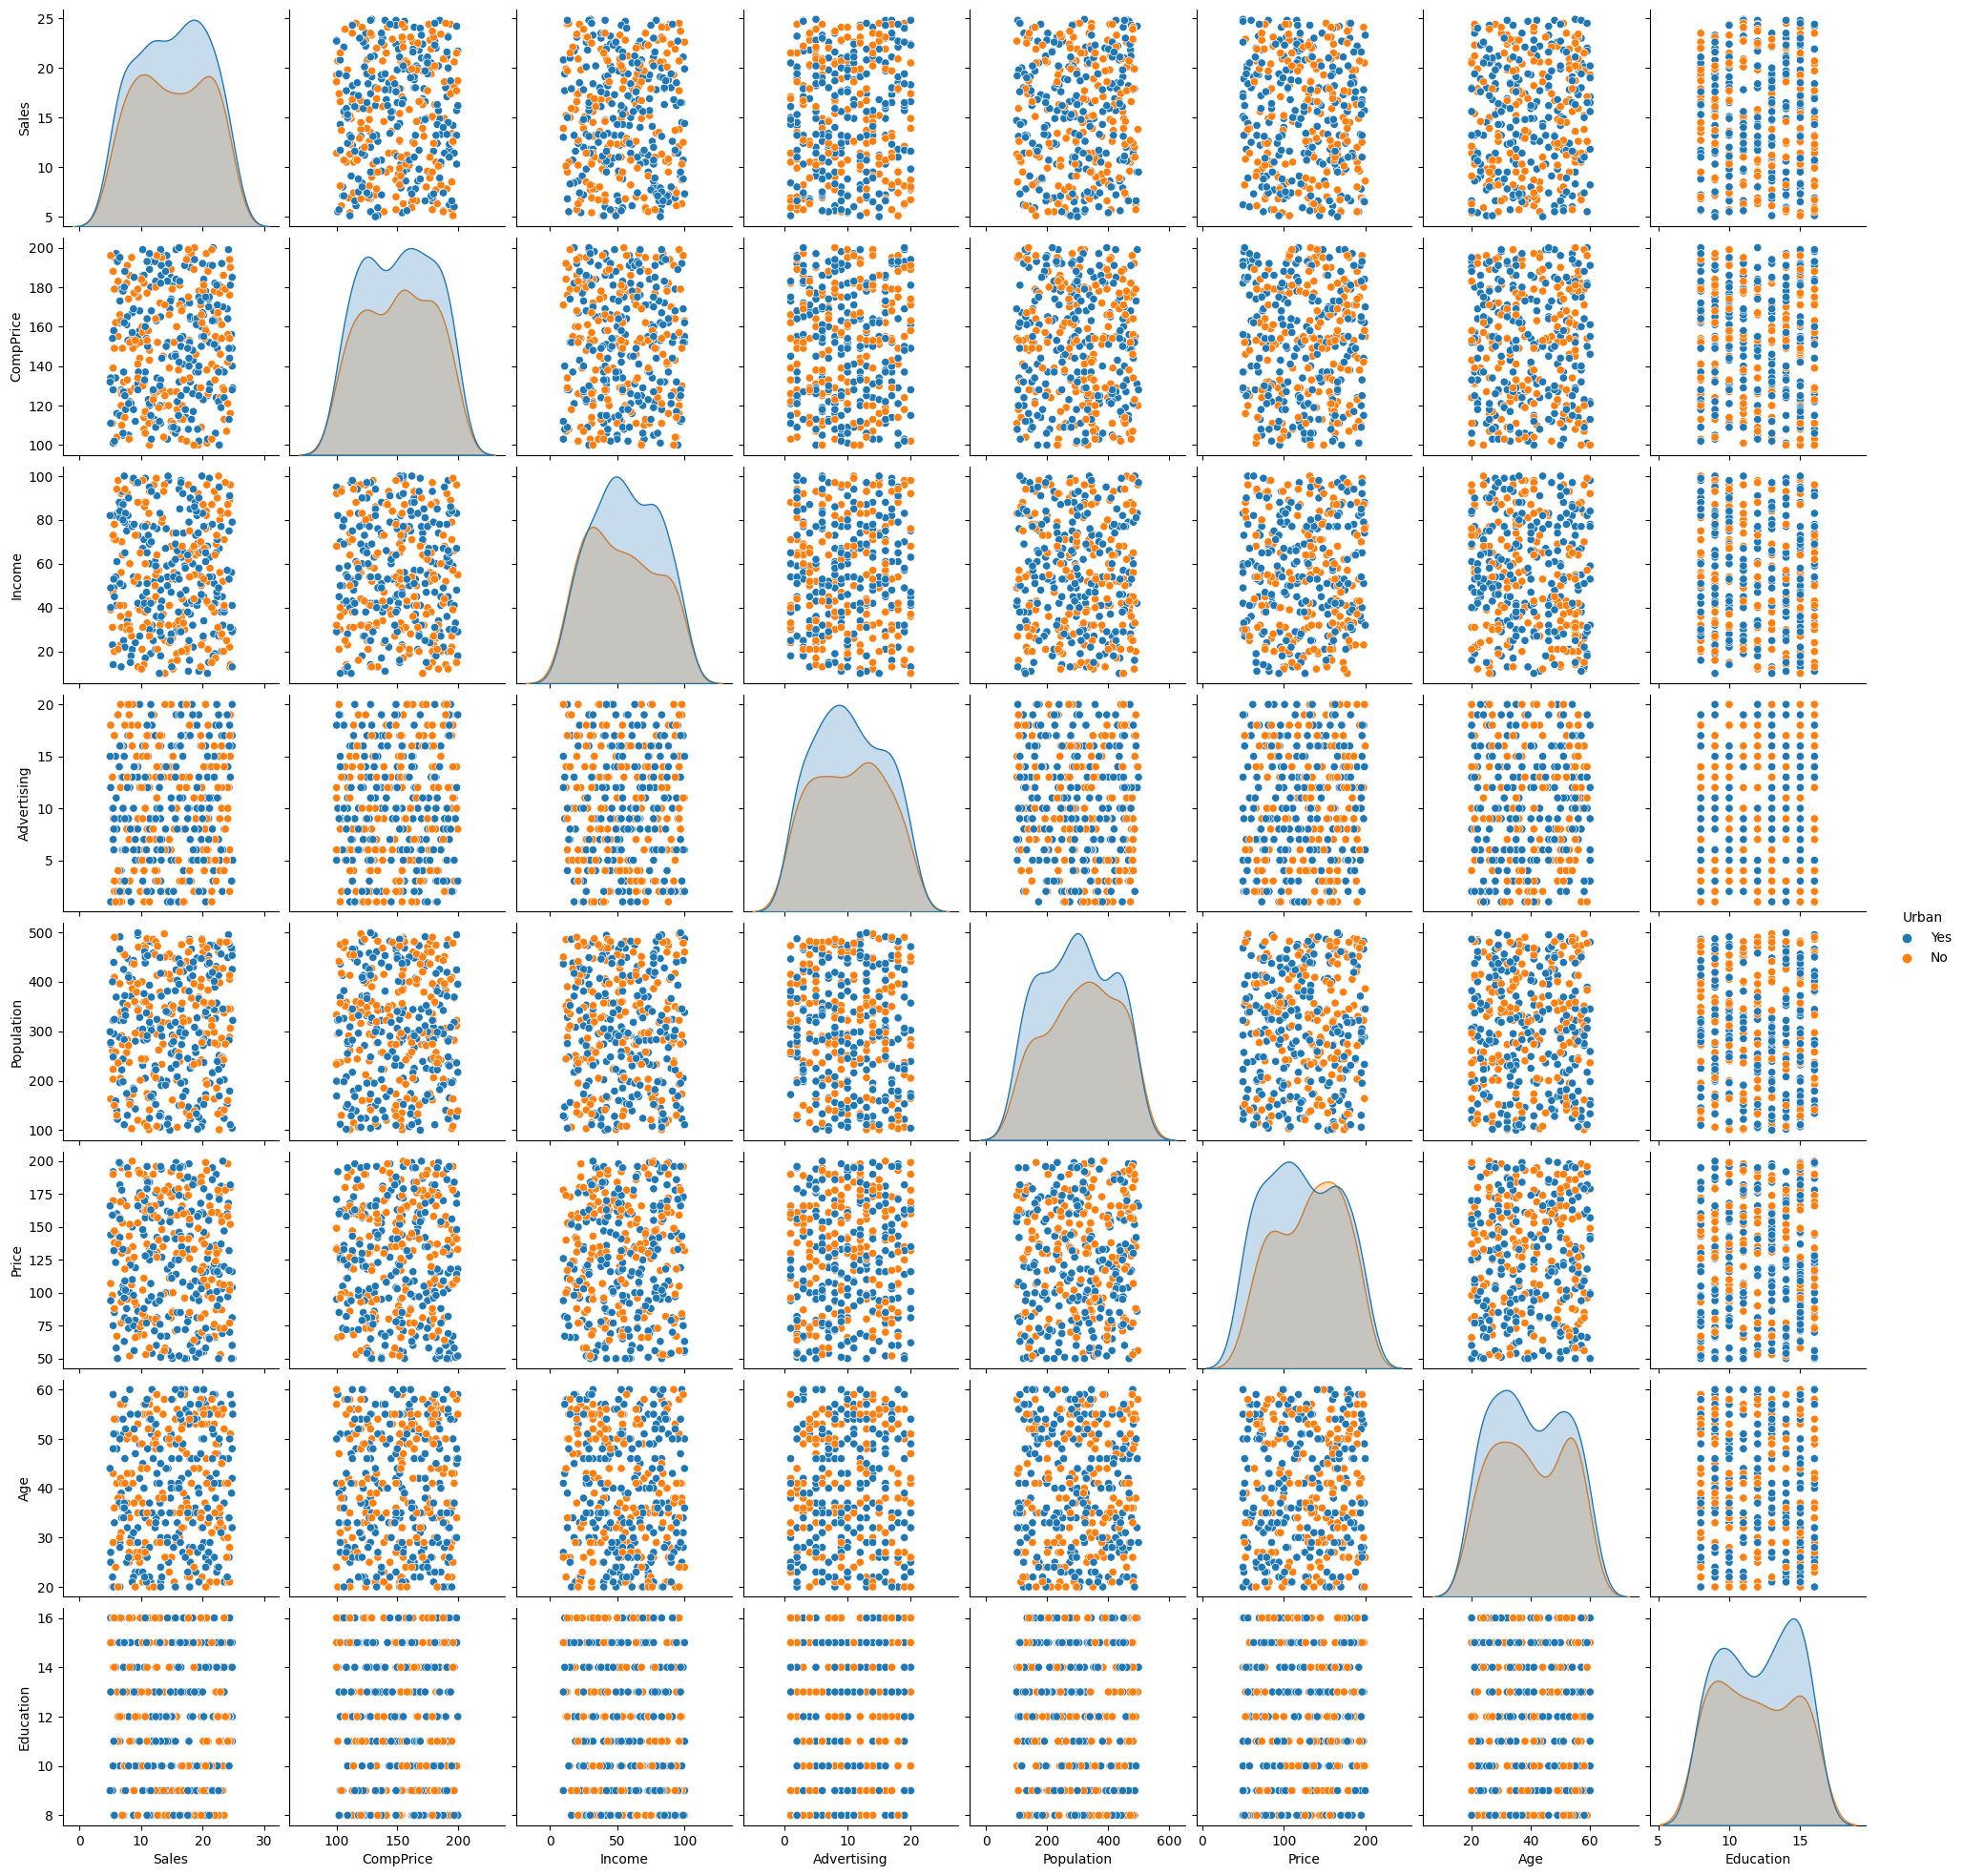

In [9]:
sns.pairplot(data=features, hue = 'Urban')

In [10]:
df=pd.get_dummies(features,columns=['Urban','US'], drop_first=True)

In [12]:
print(df.head(20))

    Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age   
0     8.6        167      21           16         405    150    Medium   29  \
1    10.5        182      88            1         473    190       Bad   57   
2     6.8        128      13            4         328    100       Bad   39   
3    21.8        168      28            4         473     74       Bad   51   
4    12.5        163      36            9         295     60       Bad   34   
5    18.5        143      22           18         430     96      Good   33   
6    22.0        182      19            3         389     66       Bad   59   
7    22.7        181      67            9         251    114      Good   34   
8    18.9        146      64            9         352    186    Medium   53   
9     8.2        122      78           12         160    100       Bad   60   
10   20.7        101      68           10         295     66    Medium   20   
11    5.7        195      71            2         40

In [13]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [14]:
df['ShelveLoc']=df['ShelveLoc'].map({'Good':10,'Medium':5,'Bad':2})

In [15]:
print(df.head(10))

   Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age   
0    8.6        167      21           16         405    150          5   29  \
1   10.5        182      88            1         473    190          2   57   
2    6.8        128      13            4         328    100          2   39   
3   21.8        168      28            4         473     74          2   51   
4   12.5        163      36            9         295     60          2   34   
5   18.5        143      22           18         430     96         10   33   
6   22.0        182      19            3         389     66          2   59   
7   22.7        181      67            9         251    114         10   34   
8   18.9        146      64            9         352    186          5   53   
9    8.2        122      78           12         160    100          2   60   

   Education  Urban_Yes  US_Yes  
0         13       True    True  
1         12      False   False  
2         13       True    T

In [17]:
x=df.iloc[:,0:5]
y=df['Sales']
x

Sales  CompPrice  Income  Advertising  Population
0      8.6        167      21           16         405
1     10.5        182      88            1         473
2      6.8        128      13            4         328
3     21.8        168      28            4         473
4     12.5        163      36            9         295
..     ...        ...     ...          ...         ...
395    7.3        162     100           15         111
396    5.0        132      82           15         299
397   11.0        164      51            2         291
398   17.6        149      64           10         245
399    8.9        185      78           14         182

[400 rows x 5 columns]

In [18]:
y

0       8.6
1      10.5
2       6.8
3      21.8
4      12.5
       ... 
395     7.3
396     5.0
397    11.0
398    17.6
399     8.9
Name: Sales, Length: 400, dtype: float64

In [19]:
df['Income'].unique()

array([ 21,  88,  13,  28,  36,  22,  19,  67,  64,  78,  68,  71,  90,
        70,  92,  57,  60,  30,  42,  83,  58,  98,  32,  41,  53,  38,
        84,  26,  59,  79,  23,  18,  77,  61,  81,  48,  27,  82,  15,
        34,  52,  76,  17,  37,  14,  65,  40,  99,  31,  45, 100,  50,
        89,  74,  39,  73,  66,  91,  56,  80,  25,  33,  20,  29,  47,
        51,  54,  69,  87,  16,  24,  97,  49,  93,  12,  86,  75,  43,
        63,  85,  96,  11,  10,  95,  55,  94,  44,  62,  46], dtype=int64)

In [22]:
df.Income.value_counts()

Income
41    11
54    11
32    10
77    10
53     9
      ..
24     2
16     2
91     2
46     2
89     1
Name: count, Length: 89, dtype: int64

In [23]:
colnames = list(df.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']

In [24]:
df.describe()

Sales   CompPrice      Income  Advertising  Population   
count  400.000000  400.000000  400.000000   400.000000  400.000000  \
mean    15.090000  150.925000   54.737500    10.262500  303.812500   
std      5.712897   28.712286   25.046495     5.512673  114.427932   
min      5.000000  100.000000   10.000000     1.000000  100.000000   
25%     10.450000  127.000000   32.000000     6.000000  205.750000   
50%     15.150000  152.500000   54.000000    10.000000  304.500000   
75%     20.100000  176.250000   77.000000    15.000000  405.000000   
max     24.900000  200.000000  100.000000    20.000000  499.000000   

            Price   ShelveLoc         Age   Education  
count  400.000000  400.000000  400.000000  400.000000  
mean   126.060000    5.770000   39.532500   11.985000  
std     43.149346    3.274738   12.186888    2.637644  
min     50.000000    2.000000   20.000000    8.000000  
25%     89.500000    2.000000   29.000000   10.000000  
50%    128.500000    5.000000   38.500000   12.000000  
75%    162.250000   10.000000   51.000000   14.000000  
max    200.000000   10.000000   60.000000   16.000000

In [25]:
df.head(35)

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age   
0     8.6        167      21           16         405    150          5   29  \
1    10.5        182      88            1         473    190          2   57   
2     6.8        128      13            4         328    100          2   39   
3    21.8        168      28            4         473     74          2   51   
4    12.5        163      36            9         295     60          2   34   
5    18.5        143      22           18         430     96         10   33   
6    22.0        182      19            3         389     66          2   59   
7    22.7        181      67            9         251    114         10   34   
8    18.9        146      64            9         352    186          5   53   
9     8.2        122      78           12         160    100          2   60   
10   20.7        101      68           10         295     66          5   20   
11    5.7        195      71            2         409    138          5   36   
12   18.0        164      90           18         225    143          2   25   
13    6.9        110      70            6         291    195         10   42   
14    6.8        127      92            3         240     77          2   38   
15   24.1        164      57           14         449     97         10   22   
16   15.1        182      60           10         292     50          2   50   
17   11.8        193      30            7         165     54          5   35   
18   22.1        106      42           18         326    136          2   38   
19    6.2        193      83           19         122     50         10   20   
20   21.2        131      58            5         408    166         10   21   
21    6.3        155      98           19         490    135         10   38   
22   18.3        194      42           20         239     62          5   35   
23    8.1        127      32            7         162    143         10   25   
24   14.8        127      41           13         406    156         10   49   
25   17.4        128      42           13         146     50          5   38   
26   13.2        111      53           16         309    168         10   21   
27   14.9        112      53            6         451    192          2   26   
28   23.0        138      38           16         140    181         10   57   
29   20.6        197      84           14         282    144          5   43   
30   20.1        182      26           11         474    117         10   55   
31   14.2        196      59            2         199     67         10   50   
32   13.4        195      79           17         233    148         10   29   
33   19.8        109      23           12         242    188          2   32   
34   12.6        127      59            4         294    131         10   29   

    Education  Urban_Yes  US_Yes  
0          13       True    True  
1          12      False   False  
2          13       True    True  
3           9       True   False  
4          14       True    True  
5          10       True    True  
6           9       True    True  
7          12       True   False  
8          15      False   False  
9          16       True   False  
10         11      False    True  
11         10      False   False  
12          8       True   False  
13         10      False    True  
14         10      False   False  
15         11       True   False  
16         10       True    True  
17         11       True   False  
18         13       True    True  
19         11       True    True  
20         15      False   False  
21         12      False   False  
22         13       True    True  
23         12      False   False  
24         13      False   False  
25          8       True    True  
26         10       True    True  
27         11      False    True  
28         14       True   False  
29          8      False    True  
30          8      False    True  
31 

In [26]:
labels = np.array(df['Price'])
features= df.drop('Price', axis = 1)
feature_list = list(df.columns)
features = np.array(df)

In [27]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 1, random_state = 42)

In [28]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (399, 11)
Training Labels Shape: (399,)
Testing Features Shape: (1, 11)
Testing Labels Shape: (1,)


In [29]:
baseline_preds = test_features[:, feature_list.index('Population')]
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  199.0


In [30]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels);

In [31]:
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.09 degrees.


In [32]:
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.94 %.


In [33]:
from sklearn.tree import export_graphviz
import pydot
tree = rf.estimators_[5]
from sklearn.tree import export_graphviz
import pydot
tree = rf.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

In [34]:
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
tree_small = rf_small.estimators_[5]
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [35]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Price                Importance: 1.0
Variable: Sales                Importance: 0.0
Variable: CompPrice            Importance: 0.0
Variable: Income               Importance: 0.0
Variable: Advertising          Importance: 0.0
Variable: Population           Importance: 0.0
Variable: ShelveLoc            Importance: 0.0
Variable: Age                  Importance: 0.0
Variable: Education            Importance: 0.0
Variable: Urban_Yes            Importance: 0.0
Variable: US_Yes               Importance: 0.0


In [36]:
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
important_indices = [feature_list.index('Population'), feature_list.index('Price')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
rf_most_important.fit(train_important, train_labels)
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.12 degrees.
Accuracy: 99.91 %.


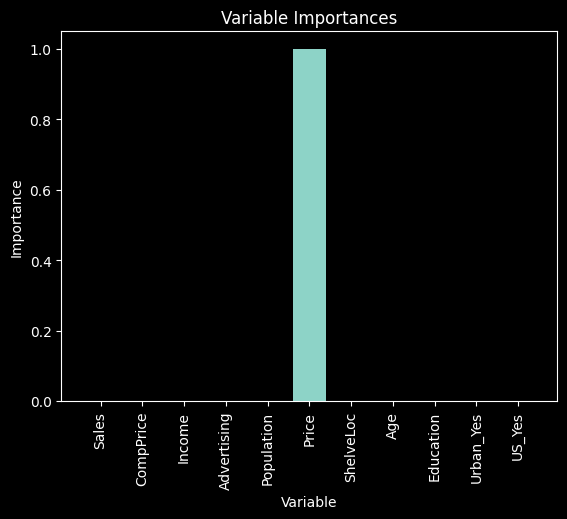

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');